# **Time Series Analysis of Daily Electricity Consumption**

**Focus:**
* Basic time series handling using pandas
* Convert to datetime, set datetime index
* Perform resampling and slicing

**Objective:**
* Analyze electricity consumption patterns over time using datetime-aware methods. Focus on resampling (daily, weekly, monthly), and slicing time ranges.

**Skills Practiced:**
* pd.to_datetime() conversion
* Setting datetime index
* Time-based slicing (df.loc['2020-01'], etc.)
* Resampling (resample('M'), resample('W'))
* Plotting simple trends

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [17]:
import matplotlib.pyplot as plt

In [3]:
path="data/household_power_consumption.txt"
df=pd.read_csv(
        path,
        sep=';',           
        na_values='?',     
        low_memory=False   
)

df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [4]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

## Time-based Slicing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [6]:
df['DateTime']=pd.to_datetime(df['Date']+' '+df['Time'], format='%d/%m/%Y %H:%M:%S')

In [7]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'DateTime'],
      dtype='object')

In [8]:
df.set_index(['DateTime'], inplace=True)
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [9]:
df.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='DateTime', length=2075259, freq=None)

In [10]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [11]:
df.loc['2006']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2006-12-31 23:55:00,31/12/2006,23:55:00,2.574,0.132,241.89,10.6,0.0,0.0,0.0
2006-12-31 23:56:00,31/12/2006,23:56:00,2.576,0.132,242.06,10.6,0.0,0.0,0.0
2006-12-31 23:57:00,31/12/2006,23:57:00,2.586,0.134,242.61,10.6,0.0,0.0,0.0


## Resampling

In [12]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [13]:
daily=df['Global_active_power'].resample('D').mean() 
daily

DateTime
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
                ...   
2010-11-22    1.417733
2010-11-23    1.095511
2010-11-24    1.247394
2010-11-25    0.993864
2010-11-26    1.178230
Freq: D, Name: Global_active_power, Length: 1442, dtype: float64

In [14]:
total_weekly=df['Global_active_power'].resample('W').sum() 
total_weekly

DateTime
2006-12-17     4599.636
2006-12-24    17477.128
2006-12-31    19736.518
2007-01-07    14961.068
2007-01-14    16176.334
                ...    
2010-10-31     9666.352
2010-11-07    11638.018
2010-11-14    13466.152
2010-11-21    11159.630
2010-11-28     8334.588
Freq: W-SUN, Name: Global_active_power, Length: 207, dtype: float64

In [15]:
max_monthly=df['Global_active_power'].resample('ME').max() 
max_monthly

DateTime
2006-12-31     9.132
2007-01-31     9.272
2007-02-28     9.410
2007-03-31    10.670
2007-04-30     8.160
2007-05-31     7.672
2007-06-30     7.614
2007-07-31     7.240
2007-08-31     8.694
2007-09-30     8.110
2007-10-31     9.036
2007-11-30     9.326
2007-12-31     9.686
2008-01-31    10.162
2008-02-29     8.716
2008-03-31     8.662
2008-04-30     9.482
2008-05-31     8.944
2008-06-30     7.578
2008-07-31     7.126
2008-08-31     7.520
2008-09-30     7.318
2008-10-31    10.290
2008-11-30    10.348
2008-12-31     7.494
2009-01-31     9.590
2009-02-28    11.122
2009-03-31     8.310
2009-04-30     7.972
2009-05-31     7.856
2009-06-30     8.760
2009-07-31     5.928
2009-08-31     7.696
2009-09-30     7.826
2009-10-31     8.708
2009-11-30     9.732
2009-12-31     8.494
2010-01-31     9.122
2010-02-28     8.724
2010-03-31     7.140
2010-04-30     8.320
2010-05-31     8.418
2010-06-30     7.508
2010-07-31     5.916
2010-08-31     5.578
2010-09-30     6.426
2010-10-31     6.892
2010

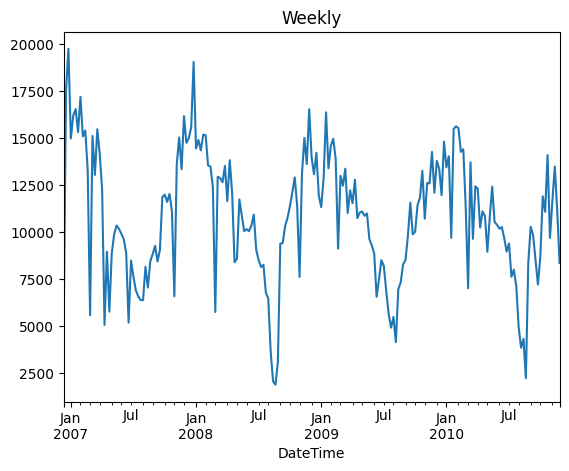

In [18]:
total_weekly.plot(title='Weekly')
plt.show()